# Generating Bollinger Band for a Stock
# 

# Importing Important Library 

In [27]:
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Importing DataSet from Yahoo Finance

In [28]:
company='SBIN.NS'
start=dt.datetime(2020, 4, 1)
end=dt.datetime.now()
df = pdr.get_data_yahoo(company, start, end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-01,194.500000,185.250000,194.000000,186.550003,52954239.0,184.843430
2020-04-03,188.199997,175.000000,187.550003,175.500000,64448494.0,173.894516
2020-04-07,187.300003,177.600006,184.399994,186.399994,72130500.0,184.694794
2020-04-08,194.399994,180.449997,182.899994,183.000000,80435759.0,181.325897
2020-04-09,190.000000,183.600006,188.000000,187.750000,62416005.0,186.032455
...,...,...,...,...,...,...
2021-11-15,515.900024,505.500000,512.400024,506.549988,13328183.0,506.549988
2021-11-16,507.399994,493.500000,507.399994,495.100006,19553216.0,495.100006
2021-11-17,505.399994,491.000000,493.850006,498.149994,20488483.0,498.149994


# Bollinger Band Code

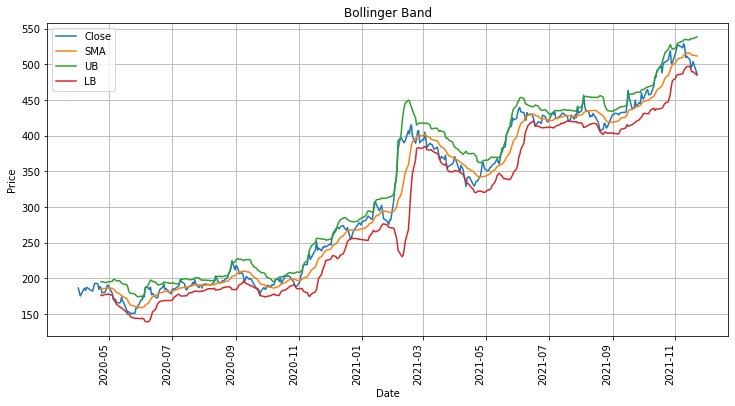

,High,Low,Open,Close,Volume,Adj Close,SMA,STD,UB,LB
Date,,,,,,,,,,
2021-11-15,515.900024,505.500000,512.400024,506.549988,13328183.0,506.549988,515.734624,9.325543,534.385710,497.083538
2021-11-16,507.399994,493.500000,507.399994,495.100006,19553216.0,495.100006,514.392318,10.938508,536.269333,492.515302
2021-11-17,505.399994,491.000000,493.850006,498.149994,20488483.0,498.149994,512.776931,11.701373,536.179676,489.374185
2021-11-18,506.200012,492.299988,499.100006,503.799988,22471070.0,503.799988,512.965391,11.520325,536.006041,489.924741
2021-11-22,506.000000,477.500000,506.000000,486.399994,28793614.0,486.399994,511.753852,13.423488,538.600829,484.906876


In [29]:
df['SMA']=df['Close'].rolling(window=13).mean()
df['STD']=df['Close'].rolling(window=13).std()
df['UB']=df['SMA']+(df['STD']*2)
df['LB']=df['SMA']-(df['STD']*2)
cl=['Close', 'SMA', 'UB', 'LB']
df[cl].plot(figsize=(12.2,6.4))
plt.title('Bollinger Band')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
df.tail()

# Ploting Bollinger Band

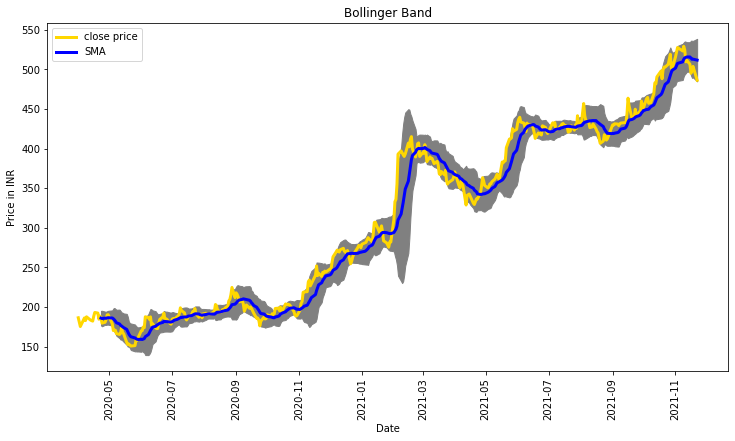

In [30]:
fig=plt.figure(figsize=(12.2,6.4))
ax=fig.add_subplot(1,1,1)
x_axis=df.index
ax.fill_between(x_axis, df['UB'], df['LB'], color='grey')
ax.plot(x_axis, df['Close'], color='gold', lw=3, label='close price')
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label='SMA')
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('Price in INR')
plt.xticks(rotation=90)
ax.legend()
plt.show()

In [31]:
p=20
df1=df[p-1: ]
df1.tail()

,High,Low,Open,Close,Volume,Adj Close,SMA,STD,UB,LB
Date,,,,,,,,,,
2021-11-15,515.900024,505.500000,512.400024,506.549988,13328183.0,506.549988,515.734624,9.325543,534.385710,497.083538
2021-11-16,507.399994,493.500000,507.399994,495.100006,19553216.0,495.100006,514.392318,10.938508,536.269333,492.515302
2021-11-17,505.399994,491.000000,493.850006,498.149994,20488483.0,498.149994,512.776931,11.701373,536.179676,489.374185
2021-11-18,506.200012,492.299988,499.100006,503.799988,22471070.0,503.799988,512.965391,11.520325,536.006041,489.924741
2021-11-22,506.000000,477.500000,506.000000,486.399994,28793614.0,486.399994,511.753852,13.423488,538.600829,484.906876


# Strategy for Buy and Sell

In [32]:
def get_signal(signal):
    buy=[]
    sell=[]
    for i in range(len(signal['Close'])):
        if signal['Close'][i]>signal['UB'][i]:
            buy.append(np.nan)
            sell.append(df1['Close'][i])
        elif signal['Close'][i]<signal['LB'][i]:
            sell.append(np.nan)
            buy.append(df1['Close'][i])
        else:
            buy.append(np.nan) 
            sell.append(np.nan) 
    return(buy,sell) 

In [33]:
df1['buyprice']=get_signal(df1)[0]
df1['sellprice']=get_signal(df1)[1]
df1.tail()

<ipython-input-33-c996b3a6bb78>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['buyprice']=get_signal(df1)[0]
<ipython-input-33-c996b3a6bb78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sellprice']=get_signal(df1)[1]


,High,Low,Open,Close,Volume,Adj Close,SMA,STD,UB,LB,buyprice,sellprice
Date,,,,,,,,,,,,
2021-11-15,515.900024,505.500000,512.400024,506.549988,13328183.0,506.549988,515.734624,9.325543,534.385710,497.083538,NaN,NaN
2021-11-16,507.399994,493.500000,507.399994,495.100006,19553216.0,495.100006,514.392318,10.938508,536.269333,492.515302,NaN,NaN
2021-11-17,505.399994,491.000000,493.850006,498.149994,20488483.0,498.149994,512.776931,11.701373,536.179676,489.374185,NaN,NaN
2021-11-18,506.200012,492.299988,499.100006,503.799988,22471070.0,503.799988,512.965391,11.520325,536.006041,489.924741,NaN,NaN
2021-11-22,506.000000,477.500000,506.000000,486.399994,28793614.0,486.399994,511.753852,13.423488,538.600829,484.906876,NaN,NaN


# Generating Buy Sell Signal

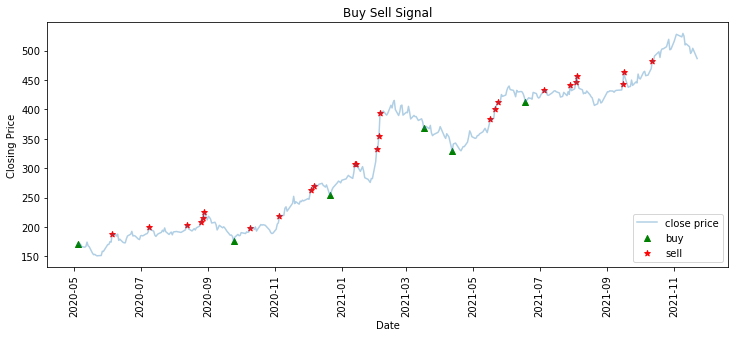

In [34]:
plt.figure(figsize=(12.2,4.5))
plt.scatter(df1.index, df1['buyprice'], color='green', label='buy', marker='^', alpha=1)
plt.scatter(df1.index, df1['sellprice'], color='red', label='sell', marker='*', alpha=1)
plt.plot(df1['Close'], label='close price', alpha=.35)
plt.title('Buy Sell Signal')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(loc='lower right')
plt.show()